

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: An Investigation in movies: How tastes have changed and over time and what makes a movie successful

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

> **Introduction**:
During the investigation we will find out what makes a movie successful and how the requirements for this changed over time. That will include the genre, the production companies behind the movie. The central measures of success will be the average vote and the relative return.
We will furthermore investigate if there is an overall factor that guarantees success and find out if seasonality is actually relevant for long-term success.

>**First question**:
What genres and production companies were most successful over the past decades? Key indicators are the relative return (adj revenue over adj budget) and the average vote.

>**Second question**:
What makes a movie financially successul? Is the financial success of a movie dependent on the release date?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib import colors as mcolors
import calendar

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movie = pd.read_csv('IMDB_movies.csv')

**First check:**
The first checks will be done to get a general idea of the dataset's structure, form and datatypes used! The learnings from this will be applied right away in order to prepare the data for analysis.

In [3]:
df_movie.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

By just looking at the data we can see that cast, genres and production_companies contain multiple values separated by a '|'. Since we want to use at least the last two of those columns we have to split rows accordingly. We can furthermore identify that the columns with relevant data (e.g. budget or revenue) sometimes contain 0. We will have to get rid of them.

In [4]:
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

While most of the columns are fine, we might need to convert some of the in order to analyse the data:
1. id as 'string'
The id column is to be treated as a string (or object in a dataframe), since it is a unique a identifier and won't be used for any calculations.
2. release_date is 'date'
The release_date column needs to be in an actual date format for analysis in the second question.

In [5]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Revenue and budget seem to have very high maximum values. We might need to check for potential outliers that could distort the later in later analyses.

In [6]:
sum(df_movie.duplicated())

1

We have to remove one duplicate!

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

**To-Dos**:
After a first look into the datasets I noted the following to do-dos in order to get the dataset ready for analysis.

1. Drop unnecessary columns
2. Change data types
3. Remove NaN  and 0 values
4. Check data for outliers
5. Split rows, where cells contain multiple values
6. Remove duplicates

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [8]:
"""drop all unnecessary columns to keep the dataset lean and simple.
This for example is helpful when we drop NaN values. Columns of less importance tend to contain NaN values more often
and would lead to a loss of a potentially useful data.
"""

print(df_movie.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [9]:

drop_list = ['popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview']
df_movie = df_movie.drop(labels=drop_list, axis=1, inplace=False)

In [10]:
# change data types: id & date
df_movie['id'] = df_movie['id'].astype(str)

df_movie['release_date'] = df_movie['release_date'].apply(lambda x: dt.strptime(x, '%m/%d/%y'))

In [11]:
# drop NaN and 0 values to get clean data
df_movie = df_movie.dropna(axis=0, how='any')

df_movie = df_movie[df_movie['vote_count'] != 0]
df_movie = df_movie[df_movie['budget_adj'] != 0]
df_movie = df_movie[df_movie['revenue_adj'] != 0]
df_movie = df_movie[df_movie['revenue'] != 0]
df_movie = df_movie[df_movie['budget'] != 0]

In [12]:
# since the return will be an essential factor for the success we have to calculate it before we check it for outliers
df_movie['return'] = df_movie['revenue_adj'] / df_movie['budget_adj']

In [13]:
# check data for outliers
print(df_movie.describe())
print(df_movie['revenue_adj'].max())
print(df_movie['budget_adj'].max())
print(df_movie['return'].max())

             budget       revenue      runtime   vote_count  vote_average  \
count  3.808000e+03  3.808000e+03  3808.000000  3808.000000   3808.000000   
mean   3.758704e+07  1.088878e+08   109.346376   533.775473      6.169932   
std    4.231339e+07  1.772539e+08    19.845146   883.515805      0.792546   
min    1.000000e+00  2.000000e+00    15.000000    10.000000      2.200000   
25%    1.000000e+07  1.423422e+07    96.000000    74.000000      5.700000   
50%    2.500000e+07  4.616189e+07   106.000000   208.000000      6.200000   
75%    5.000000e+07  1.260484e+08   119.000000   584.000000      6.700000   
max    4.250000e+08  2.781506e+09   338.000000  9767.000000      8.400000   

       release_year    budget_adj   revenue_adj        return  
count   3808.000000  3.808000e+03  3.808000e+03  3.808000e+03  
mean    2001.233193  4.469337e+07  1.386069e+08  3.016144e+02  
std       11.326435  4.488070e+07  2.169466e+08  1.654156e+04  
min     1960.000000  9.693980e-01  2.370705e+00  2

While the vote average seems to be in order, the maximum return is way off. We will therefore remove the top and low 1% quantile to clean the data.

In [14]:
# remove both quantiles and check again
q1 = df_movie['return'].quantile(0.99)
q2 = df_movie['return'].quantile(0.01)
df_movie = df_movie[(df_movie['return'] < q1) & (df_movie['return'] > q2)]


print(df_movie.describe())
print(df_movie['revenue_adj'].max())
print(df_movie['budget_adj'].max())
print(df_movie['return'].max())

             budget       revenue      runtime   vote_count  vote_average  \
count  3.730000e+03  3.730000e+03  3730.000000  3730.000000   3730.000000   
mean   3.818600e+07  1.098734e+08   109.558177   539.005094      6.174397   
std    4.247963e+07  1.777380e+08    19.896486   888.157284      0.786386   
min    2.000000e+00  5.000000e+00    15.000000    10.000000      3.300000   
25%    1.000000e+07  1.472833e+07    96.000000    75.000000      5.700000   
50%    2.500000e+07  4.700000e+07   106.000000   213.000000      6.200000   
75%    5.000000e+07  1.280054e+08   119.750000   589.750000      6.700000   
max    4.250000e+08  2.781506e+09   338.000000  9767.000000      8.400000   

       release_year    budget_adj   revenue_adj       return  
count   3730.000000  3.730000e+03  3.730000e+03  3730.000000  
mean    2001.290617  4.539072e+07  1.380961e+08     3.848049  
std       11.263143  4.499856e+07  2.097755e+08     6.244807  
min     1960.000000  3.000000e+00  5.926763e+00     0.

In [15]:
#split rows according to multiple values in cast, genres and production_companies
"""
First we have to identify how often we have to split different rows.
Therefore we need to find out how the delimiter '|' occurs.
"""
df_movie['genres_count'] = df_movie.genres.apply(lambda x: str(x).count('|',0,len(str(x))))
df_movie['production_companies_count'] = df_movie.production_companies.apply(lambda x: str(x).count('|',0,len(str(x))))

# list of columns to split
split_columns = ['genres', 'production_companies']

In [16]:
"""
For actually splitting the columns we have to iterate through the column list and than do x splits
(x is the maximum amount of delimiters in each row). We will therefore iterate through each column
and then filter for the amount of elements in there in order to find out how often we need to split each row.
"""

for c in split_columns: #do the split for each necessary column
    c_count = '{}_count'.format(c)
    c_list = '{}_list'.format(c)
    c_list = list(df_movie[c_count].unique())
    c_list.sort(reverse=True)
    df_temp = 'df_{}'.format(c)
    df_temp = df_movie.copy()
    df_temp = df_temp.loc[df_temp[c_count] == 0] # we cannot split rows without a delimiter, therefore we do that before the iteration
    for element in c_list: #do splits according to amount of different values
        df_element = 'df_{}'.format(element)
        df_element = df_movie.copy()
        if element != 0:
            df_element = df_element.loc[df_element[c_count] >= element]
        else: # since 0 is already done we just need a '>'
            df_element = df_element.loc[df_element[c_count] > element]
        df_element[c] = df_element[c].apply(lambda x: x.split('|')[element])
        df_temp = df_temp.append(df_element, ignore_index=True) #append dataframe with each element from split
        df_temp.drop_duplicates() # get rid of duplicates
    df_movie = df_temp #before moving to the next element in split_columns make sure that df_movie gets updated
    
print(df_movie.head())

       id    imdb_id    budget    revenue      original_title  \
0  266294  tt1850457  30000000  105011053             Sisters   
1  254905  tt2893490   4000000     143101          Manglehorn   
2  253331  tt2883434   9000000   21571189      Black or White   
3  198185  tt1647668  25000000   38307627  Million Dollar Arm   
4  254191  tt3177316   1000000       9318           Honeymoon   

             director  runtime  genres     production_companies release_date  \
0         Jason Moore      118  Comedy          Little Stranger   2015-12-18   
1  David Gordon Green       97   Drama  Worldview Entertainment   2015-06-03   
2         Mike Binder      121   Drama       Treehouse Pictures   2015-01-30   
3     Craig Gillespie      124   Drama     Walt Disney Pictures   2014-05-09   
4        Leigh Janiak       87  Horror     Fewlas Entertainment   2014-09-12   

   vote_count  vote_average  release_year    budget_adj   revenue_adj  \
0         399           5.9          2015  2.759999e+07

In [17]:
# we can now drop the count columns
df_movie.drop(['genres_count', 'production_companies_count'], axis=1)

,id,imdb_id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,return
0,266294,tt1850457,30000000,105011053,Sisters,Jason Moore,118,Comedy,Little Stranger,2015-12-18,399,5.9,2015,2.759999e+07,9.661013e+07,3.500368
1,254905,tt2893490,4000000,143101,Manglehorn,David Gordon Green,97,Drama,Worldview Entertainment,2015-06-03,35,5.0,2015,3.679998e+06,1.316529e+05,0.035775
2,253331,tt2883434,9000000,21571189,Black or White,Mike Binder,121,Drama,Treehouse Pictures,2015-01-30,72,6.7,2015,8.279996e+06,1.984549e+07,2.396799
3,198185,tt1647668,25000000,38307627,Million Dollar Arm,Craig Gillespie,124,Drama,Walt Disney Pictures,2014-05-09,182,6.6,2014,2.302728e+07,3.528481e+07,1.532305
4,254191,tt3177316,1000000,9318,Honeymoon,Leigh Janiak,87,Horror,Fewlas Entertainment,2014-09-12,137,5.3,2014,9.210911e+05,8.582726e+03,0.009318
5,230266,tt2667960,5500000,5000000,Miss Julie,Liv Ullmann,120,Drama,Maipo Film- og TV Produksjon,2014-09-07,15,5.4,2014,5.066001e+06,4.605455e+06,0.909091
6,244783,tt2182972,6000000,32251,Song One,Kate Barker-Froyland,86,Drama,Worldview Entertainment,2014-01-20,58,5.7,2014,5.526546e+06,2.970611e+04,0.005375
7,241771,tt3125324,7000000,14618727,Beyond the Lights,Gina Prince-Bythewood,116,Drama,Relativity Media,2014-09-10,95,6.9,2014,6.447637e+06,1.346518e+07,2.088390
8,249660,tt2528814,17000000,29789000,God's Not Dead,Harold Cronk,113,Drama,Pure Flix Entertainment,2014-03-21,146,6.1,2014,1.565855e+07,2.743838e+07,1.752294
9,25793,tt0929632,10000000,63647833,Precious,Lee Daniels,110,Drama,Smokewood Entertainment Group,2009-11-06,205,6.8,2009,1.016400e+07,6.469169e+07,6.364783


In [18]:
#last but not least, we will again make sure, that there are no duplicates
df_movie = df_movie.drop_duplicates()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What genres were most successful over the past decades?

To evaluate the performance over decades we first have to have extract the release decade for each movie.

In [19]:
df_movie['release_decade'] = df_movie['release_year'].apply(lambda x: (x//10)*10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
"""
The next step is to group our central metrics adjusted revenue, adjusted budget and vote average.
For the vote average we need to calculate weighted mean and create a predefined function to use in the groupby.
Return can be ignored for now, since we can recalculate it based on revenue and budget.
"""
weighted_mean = lambda x: np.average(x, axis=0, weights=df_movie.loc[x.index, 'vote_count']) # function to calculate weighted mean

dict_function = {'budget_adj': 'sum', 'revenue_adj': 'sum', 'vote_count': 'sum', 'vote_average': weighted_mean}
df_genres_gr = df_movie.groupby(['genres', 'release_decade'], as_index=False).agg(dict_function)
df_genres_gr['return'] = df_genres_gr['revenue_adj']/df_genres_gr['budget_adj']

In [21]:
"""
To create all necessary charts we need to iterate through some lists and also assign colours to each genre.
That will be done now, so that we can re-use it later, if necessary
"""
list_metrics = ['return']
list_genre = list(set(df_genres_gr['genres']))
list_decade = list(set(df_genres_gr['release_decade']))
list_decade.sort()
list_color = ['blue', 'red', 'cyan', 'darkred', 'green', 'darkgreen', 'yellow', 
          'orange', 'lightblue', 'darkgray', 'olive', 'violet', 
          'gold', 'black', 'darkorange', 'grey', 'lightgreen', 'magenta', 'navy', 'hotpink'
         ]

dict_color = {}
length = len(list_genre)
i = 0
while i < length:
    g = list_genre[i]
    dict_color[g] = list_color[i]
    i+=1

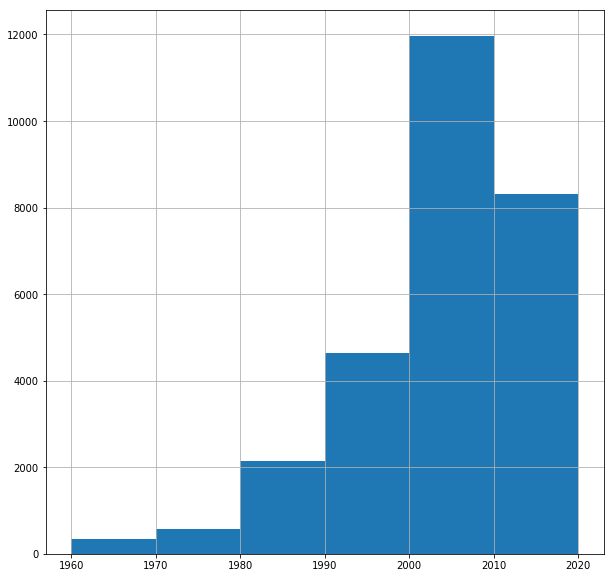

In [22]:
"""
Before we start analysing the genre's performance we'll check, if the data is 100% reliable, or of it has limitations.
In order to do that, we will visualize the distribution over time and within the genres'.
"""
bins = range(1960,2030,10)
df_movie['release_decade'].hist(bins=bins, grid=True, figsize=(10,10)) # check the amount of movies in each decade
plt.show()

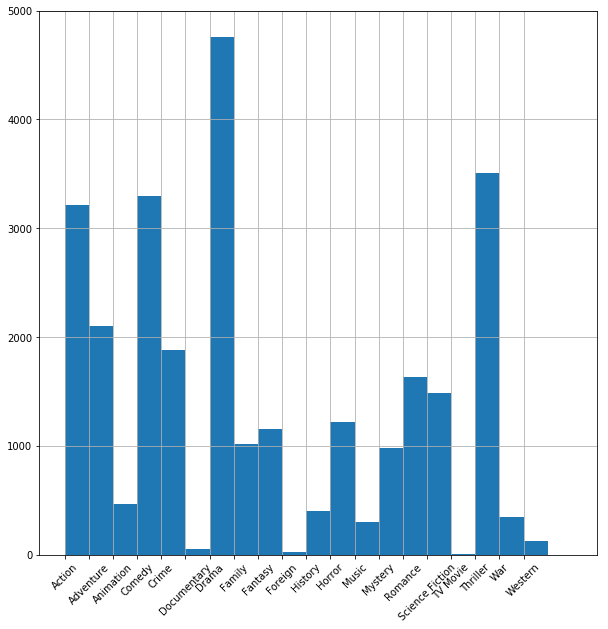

In [23]:
bins = range(len(list_genre)+2)
df_movie['genres'].hist(bins=bins, grid=True, figsize=(10,10)) # check the amount of movies withing each genre
plt.xticks(rotation=45)
plt.show()

Just those two histograms show one big problem of the IMDB dataset. The data is not distributed evenly among neither genres nor decades. While that may be ok for genres, since the amount of produced movies often differs it represents a huge problem when we start to evaluate the development of single genres over time. Earlier decades may not be representative, because the size of the sample may not be big enough to represent the population. We have to keep that in mind later.
From a genre perspective Documentary, Foreign, TV Movie and Western are critical.

For TV Movie there are no records for 1960!
For TV Movie there are no records for 1970!
For TV Movie there are no records for 1980!
For TV Movie there are no records for 2000!
For TV Movie there are no records for 2010!
For Documentary there are no records for 1960!
For Documentary there are no records for 1970!
For Foreign there are no records for 1960!
For Foreign there are no records for 1970!


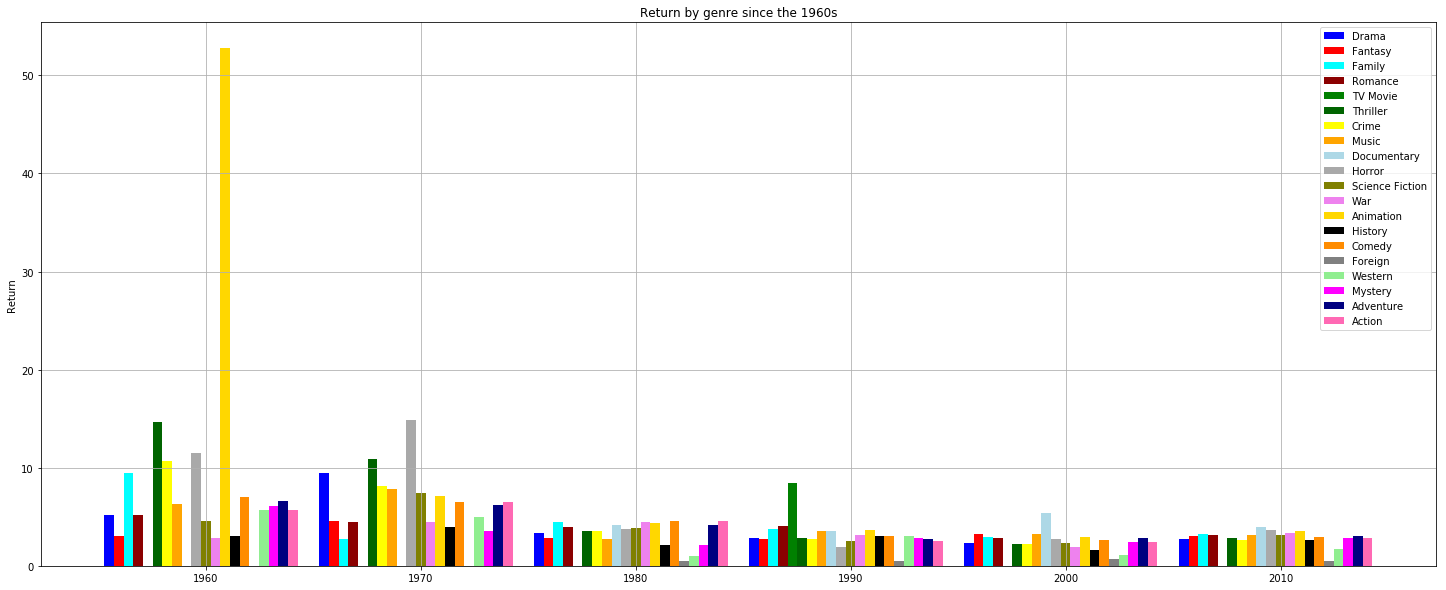

In [24]:
"""
In order to check the performance of each genre over time we will draw a bar chart and also a heatmap to visualise
the differences. To draw the bar chart we have to draw multiple charts (each genre is one) in the same plot.
Later the same thing will be done for the vote averages.
"""

ind = np.arange(len(list_decade))  # the x locations for the groups
width = 0.045    # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))

for n, genre in enumerate(list_genre): # generate columns/bars for each decade by arrays
    data = df_genres_gr.loc[df_genres_gr['genres'] == genre][['release_decade','return']] # filter data for respective genre
    data_dict = {}
    for decade in list_decade:
        data_dict[decade] = 0.0
    for decade in list_decade: # to keep arrays in the same size we have to check for non-existent decades and insert 0
        try:
            value = data.loc[data['release_decade'] == decade, ['return']].reset_index(drop=True)
            value = value['return'][0]
            data_dict[decade] = value
        except IndexError: # print message if no data is found for a genre-decade combination
            print('For {} there are no records for {}!'.format(genre, decade))
            pass
    data = np.array(list(data_dict.values()))
    bars = ax.bar(ind + width*n, data, width, color=dict_color[genre], label=genre)

# plot specs to make the chart more readable
ax.set_xticklabels(list_decade)
ax.set_xticks(ind + width*len(list_genre) / 2)
ax.set_ylabel('Return')
ax.set_title('Return by genre since the 1960s')
plt.legend()
plt.grid()
plt.show()


# rank genres according to performance
dict_return = {} # contains returns per genre per decade
dict_return_rank = {} # contains rank per genre per decade (return)
for decade in list_decade: # find top 3 genres for each decade
    dict_return[decade] = {}
    dict_return_rank[decade] = {}
    data = df_genres_gr.loc[df_genres_gr['release_decade'] == decade][['genres','return']].sort_values(by='return', inplace=False, ascending=False).reset_index(drop=True)
    for index, row in data.iterrows(): # assign keys and values to decades
        dict_return[decade][data['genres'][index]] = round(data['return'][index], 2) # puts return value in dict
        dict_return_rank[decade][data['genres'][index]] = index+1 # puts rank for return in dict

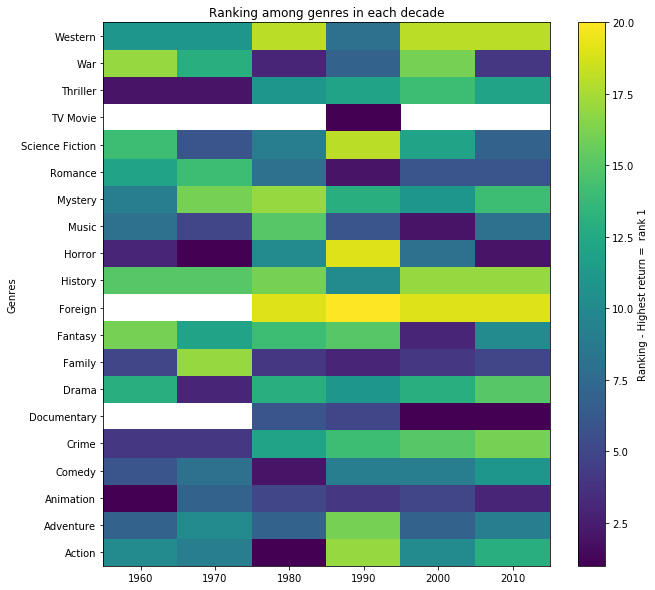


In the 1960's the genres with the highest return were:
1. Animation with a return of 52.78
2. Thriller with a return of 14.64
3. Horror with a return of 11.49

In the 1970's the genres with the highest return were:
1. Horror with a return of 14.86
2. Thriller with a return of 10.89
3. Drama with a return of 9.43

In the 1980's the genres with the highest return were:
1. Action with a return of 4.56
2. Comedy with a return of 4.53
3. War with a return of 4.51

In the 1990's the genres with the highest return were:
1. TV Movie with a return of 8.4
2. Romance with a return of 4.1
3. Family with a return of 3.72

In the 2000's the genres with the highest return were:
1. Documentary with a return of 5.34
2. Music with a return of 3.25
3. Fantasy with a return of 3.21

In the 2010's the genres with the highest return were:
1. Documentary with a return of 3.91
2. Horror with a return of 3.64
3. Animation with a return of 3.57


In [25]:
"""
Now we will draw the heatmap.
"""

df_cm = pd.DataFrame(dict_return_rank) # dataframe to be used for color-map

# specifications for heatmap
plt.figure(figsize=(10,10))
plt.pcolor(df_cm)
plt.colorbar(use_gridspec=True).set_label('Ranking - Highest return =  rank 1')
plt.yticks(np.arange(0.5, len(df_cm.index), 1), df_cm.index)
plt.xticks(np.arange(0.5, len(df_cm.columns), 1), df_cm.columns)
plt.ylabel('Genres')
plt.title('Ranking among genres in each decade')
plt.show()        

# generate text output 
out_mes_intro = '\nIn the {}\'s the genres with the highest return were:' # messages to be printed
out_mes_text = '{}. {} with a return of {}'

for decade in dict_return: # print messages for top 3 genres in each decade
    print(out_mes_intro.format(decade))
    for n, genre in enumerate(dict_return[decade]):
        print(out_mes_text.format(n+1, genre, dict_return[decade][genre]))
        if n == 2: # stop after the first 3
            break

**Return per genre**
The results clearly show one trend. Older movies, no matter which genre they belong to, generally seem to have a higher return that newer ones. However that can be easily explained by their age: They simply have more time to accumulate additional revenue by sales outside of movie theaters (e.g. DVDs or simple streaming), therefore their return has to be higher. In that context it still looks odd that returns drop significantly from the 1980s on.
For TV movies we cannot draw a conclusions, since we have data only for the 1980s (were they performed twice a as good as the second-best genre). Also, even in that time the size of the sample is very small.

In general we can conclude that Thriller were financially very successful in the past (1960s and 70s) while Documentaries seem to be the most profitable in recent years (2000s and 2010s).
In the 60s and 70s also Horror, Music, and Crime were successful. After that, next to Documentaries, Family and Animation became more successful. War and Action were on top in the 80s and TV in the 90s. Afterwards, the second and third places changed next to Documentaries on the first place.

Overall Animation, Documentary, Music, Horror and Family seem to deliver a well performance throughout the last decades and are always among the best performing genres. However, since we have very few documentaries only, that conclusion is shaky.

For TV Movie there are no records for 1960!
For TV Movie there are no records for 1970!
For TV Movie there are no records for 1980!
For TV Movie there are no records for 2000!
For TV Movie there are no records for 2010!
For Documentary there are no records for 1960!
For Documentary there are no records for 1970!
For Foreign there are no records for 1960!
For Foreign there are no records for 1970!


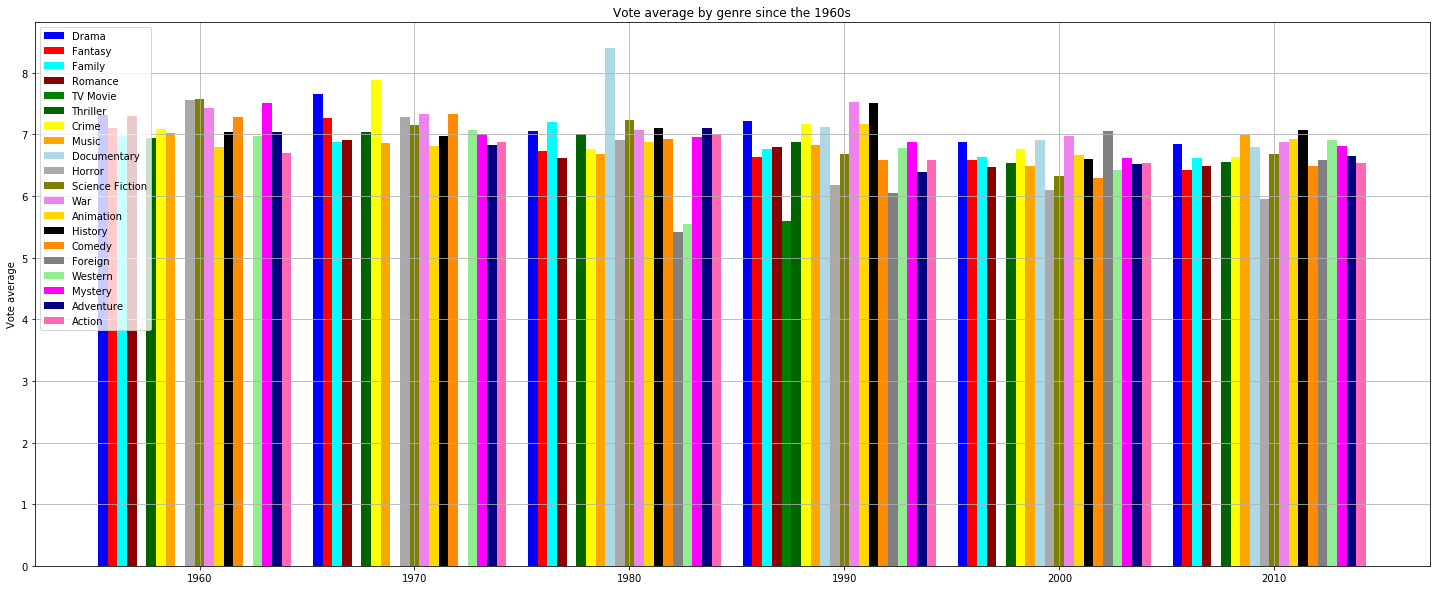

In [26]:
# check average vote per genre over time
ind = np.arange(len(list_decade))  # the x locations for the groups
width = 0.045    # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))

for n, genre in enumerate(list_genre): # generate columns/bars for each decade by arrays
    data = df_genres_gr.loc[df_genres_gr['genres'] == genre][['release_decade','vote_average']] # filter data for respective genre
    data_dict = {}
    for decade in list_decade:
        data_dict[decade] = 0.0
    for decade in list_decade: # to keep arrays in the same size we have to check for non-existent decades and insert 0
        try:
            value = data.loc[data['release_decade'] == decade, ['vote_average']].reset_index(drop=True)
            value = value['vote_average'][0]
            data_dict[decade] = value
        except IndexError:
            print('For {} there are no records for {}!'.format(genre, decade))
            pass
    data = np.array(list(data_dict.values()))
    bars = ax.bar(ind + width*n, data, width, color=dict_color[genre], label=genre)

# plot specs
ax.set_xticklabels(list_decade)
ax.set_xticks(ind + width*len(list_genre) / 2)
ax.set_ylabel('Vote average')
ax.set_title('Vote average by genre since the 1960s')
plt.legend()
plt.grid()
plt.show()


# rank genres according to performance
dict_return = {} # contains average vote per genre per decade
dict_return_rank = {} # contains rank per genre per decade (return)
for decade in list_decade: # find top 3 genres for each decade
    dict_return[decade] = {}
    dict_return_rank[decade] = {}
    data = df_genres_gr.loc[df_genres_gr['release_decade'] == decade][['genres','vote_average']].sort_values(by='vote_average', inplace=False, ascending=False).reset_index(drop=True)
    for index, row in data.iterrows(): # assign keys and values to decades
        dict_return[decade][data['genres'][index]] = round(data['vote_average'][index], 2) # puts return value in dict
        dict_return_rank[decade][data['genres'][index]] = index+1 # puts rank for return in dict

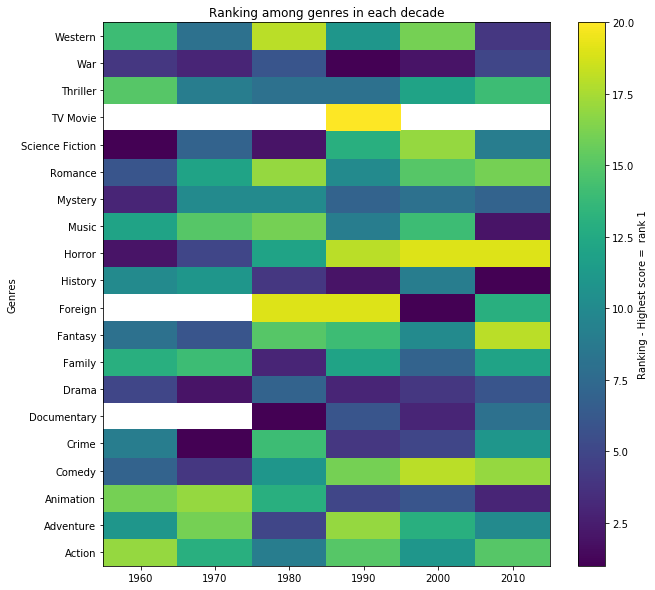


In the 1960's the genres with the highest vote score were:
1. Science Fiction with a score of 7.58
2. Horror with a score of 7.57
3. Mystery with a score of 7.51

In the 1970's the genres with the highest vote score were:
1. Crime with a score of 7.88
2. Drama with a score of 7.66
3. War with a score of 7.33

In the 1980's the genres with the highest vote score were:
1. Documentary with a score of 8.4
2. Science Fiction with a score of 7.23
3. Family with a score of 7.2

In the 1990's the genres with the highest vote score were:
1. War with a score of 7.52
2. History with a score of 7.51
3. Drama with a score of 7.21

In the 2000's the genres with the highest vote score were:
1. Foreign with a score of 7.05
2. War with a score of 6.98
3. Documentary with a score of 6.9

In the 2010's the genres with the highest vote score were:
1. History with a score of 7.07
2. Music with a score of 6.99
3. Animation with a score of 6.92


In [27]:
"""
Now we will draw the heatmap.
"""
      
df_cm = pd.DataFrame(dict_return_rank) # dataframe to be used for color-map

# specifications for heatmap
plt.figure(figsize=(10,10))
plt.pcolor(df_cm)
plt.colorbar(use_gridspec=True).set_label('Ranking - Highest score =  rank 1')
plt.yticks(np.arange(0.5, len(df_cm.index), 1), df_cm.index)
plt.xticks(np.arange(0.5, len(df_cm.columns), 1), df_cm.columns)
plt.ylabel('Genres')
plt.title('Ranking among genres in each decade')
plt.show()        

# generate text output 
out_mes_intro = '\nIn the {}\'s the genres with the highest vote score were:' # messages to be printed
out_mes_text = '{}. {} with a score of {}'

for decade in dict_return: # print messages for top 3 genres in each decade
    print(out_mes_intro.format(decade))
    for n, genre in enumerate(dict_return[decade]):
        print(out_mes_text.format(n+1, genre, dict_return[decade][genre]))
        if n == 2: # stop after the first 3
            break

**Vote average per genre**
The first thing we note is, that in contrast to financial return the average votes between different genres are far more equal distributed. Also we can see, that the average vote of the first places has decreased over time. While it was around 7.5 in the 60s it is now around 7.

Noteworthy is that financially successful movies are not necessarily well from a critical perspective. While Science Fiction and Drama as well performing financially throughout time, they are more critically acclaimed. In the 70s Mystery, Crime and Comedy were rated best, then it was Science Fiction on number 2 (Documentary on 1, similar to its financial performance). From the 90s on War became critically acclaimed (No 1 in the 90s, No 2 in the 2000s). In the 90s History was on the second place and in the 2000s it was Foreign. Lately History, Music and Animation have been rated best.

In general we see that financial success does not equal critical success. Especially Foreign (keep in mind that very few of those are in the dataset) and Science Fiction movies get rated well, but are just not as popular. Same goes for non-entertainment movies, like History movies. However Animation movies for example are good in both ways. That might be due to the reason, that they are usually targeting a bigger audience (children in general) and that the technical (and not the acting) performance is rated.

### What makes a movie financially successul? Is the financial success of a movie dependent on the release date?

**What makes a movie financially successful?**
From a business perspective any investment is successful if it pays off, meaning that the return on investment is bigger than 1. Same thing goes for movies. We will investigate if it pays off to put more money in a movie and which genre in general is very successful.

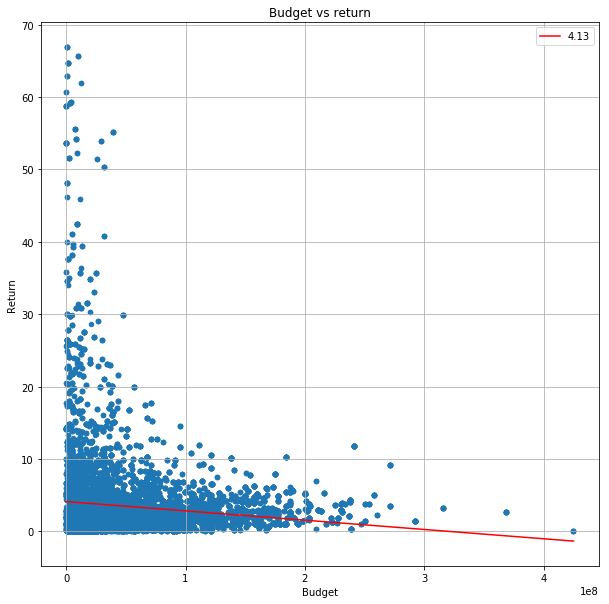

In [28]:
"""
To find out about the relation between investment (budget) and return we will conduct a regression analysis between both factors.
To do so we will do a scatter plot to show the distribution of single movies and calculate the linear regression.
"""
fig, ax = plt.subplots() # define plot
figsize = (10,10)
df_movie.plot.scatter(x='budget_adj', y='return', ax=ax, grid=True, figsize=figsize) # scatter plot to show all movies revenues and budgets

# data in numpy-arrays for polynomial lines
x = np.array(df_movie['budget_adj'])
y = np.array(df_movie['return'])
x_min = df_movie['budget_adj'].min()
x_max = df_movie['budget_adj'].max()

# polynomial lines with different degrees
p_return1 = np.poly1d(np.polyfit(x,y,1))
xp = np.linspace(x_min, x_max, 100) # equally distribute the data within the given range
plt.plot(xp, p_return1(xp), '-', c='r',label=round(p_return1.c[1], 3))
plt.title('Budget vs return') # title of chart
plt.xlabel('Budget')
plt.ylabel('Return')
plt.legend()


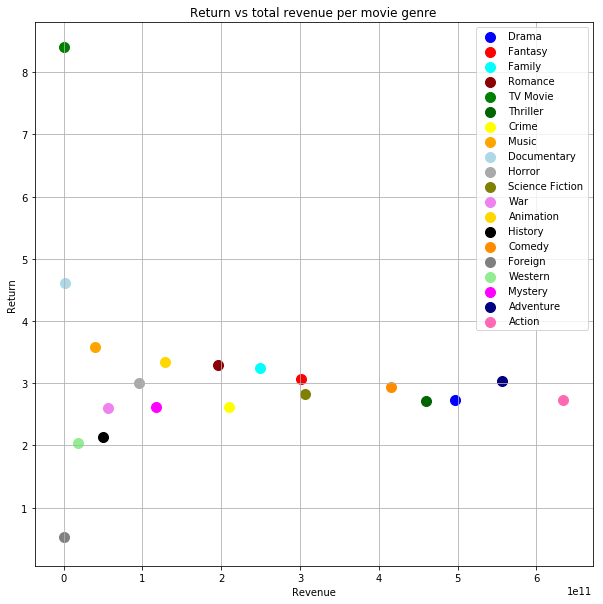

In [29]:
"""
We will now check which genre has the highest return historically. To do so we will aggregate by genre.
Then we will compare absolute and relative return."""

df_return = df_movie[['genres', 'revenue_adj', 'budget_adj']].groupby(['genres'], as_index=False).sum() # group dataframe
df_return['return'] = df_return['revenue_adj'] / df_return['budget_adj'] # calc return

fig, ax = plt.subplots() # define plot
figsize = (10,10)

for genre in list_genre: # iterate over genres and plot each point
    color = dict_color[genre]
    df_return.loc[df_return['genres'] == genre].plot.scatter(x='revenue_adj', y='return', grid=True, c=color,
                                                             ax=ax, label=genre, figsize=figsize, s=100)
    plt.title('Return vs total revenue per movie genre')
    plt.xlabel('Revenue')
    plt.ylabel('Return')

The chart, that shows budget vs return clearly indicates something surprising: Since the regression line is decreasing we have to conclude that movies with higher budget not necessarily have a higher return. On the contrary it seems to be more likely that a lower budget enables a film to generate a higher return. That is only natural, especially for movies, that belong to a niche, but become a classic and are watched more than anticipated.

The split in genres supports this. While popular genres like Action, Comedy or Adventure make up for a lot of absolute revenue, their return is pretty much on average. However some niche genres, for example Documentary or Music, have significantly higher returns, but make up for a lot less revenue in total. Some of those genres also have a below-average return. In general we have to be careful with genres on the left side of the graph, since we saw earlier, that most of them also not representative.

In [30]:
# to evaluate the influence of the release date we will observe the release month and compare return and average vote
df_movie['release_month'] = df_movie['release_date'].apply(lambda x: x.month)
df_movie['release_day'] = df_movie['release_date'].apply(lambda x: x.timetuple().tm_yday)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x7f49c3124dd8>,
 <a list of 12 Text xticklabel objects>)

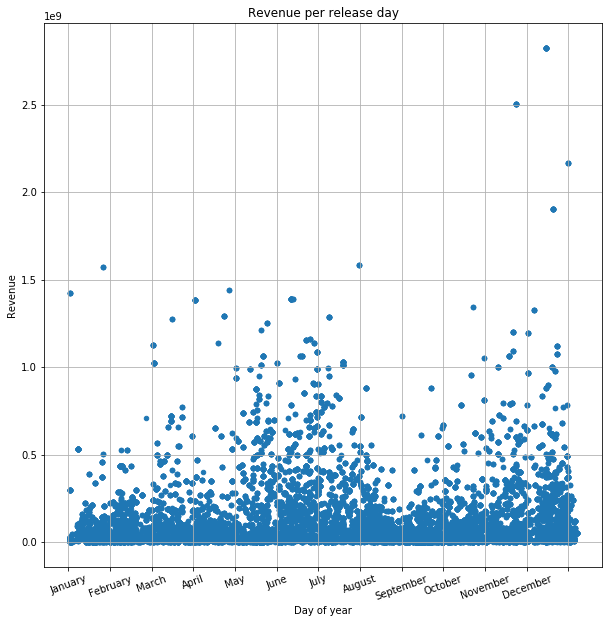

In [31]:
"""
Now we will check if the release date influences the absolute financial success of a movie.
The hypothesis is that movies are more successful during the winter, when people tend to do more indoor activities
and before the summer break, when teenagers have more time to spend outside of school."""

df_movie.plot.scatter('release_day', 'revenue_adj', figsize=figsize, grid=True) # plot the data
plt.title('Revenue per release day')
plt.xlabel('Day of year')
plt.ylabel('Revenue')
plt.xticks(np.arange(0, 365, step=30), calendar.month_name[1:13], rotation=20) # show calendar month for better orientation

The results are not as extreme as expected. However we can clearly see, that the total revenue of movies released in the first and third quarter of the year seems to be lower than for the rest. Both movies that come out right before the summer (or in the beginning of it) and by the end of the year (before Christmas, als a time of more holidays). Based on my own experience those are the times when so-called blockbuster movies, which are potential cash-cows, are released. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

**Final conclusion**

It has become clear that the most successful genres changed over time. From a financial perspective nowadays Horror and Animation movies are amongst them, next to Fantasy and Music. From a quality perspective other genres are on top: Whil Animation and Music also get good ratings, less popular genres, like History or War, get good ratings as well. However for those the size of the sample is very small.
In general we can conclude that financial success does not mean, that a movie is considered good. That aligns with personal experience: Huge, expensive blockbuster movies are usually made for broad entertainment and less consideration of quality. However, in the end it depends on how oneself defines quality.

If the take a look at the second part of the analysis we can draw another interesting conclusion: Huge budgets do not mean that the return will be higher. On the contrary, it seems that smaller investments bring the chance of higher returns. Of course this is relative, potentially you can still make more money (in absolute terms) by just increasing the budget and get more people to watch (and pay) for it.
If you take a closer look at single genres we can confirm this. Some genres have a insane amount of revenue generated, but their return seems to be smaller than the average. Of course the flaws of the dataset (uneven amounts of movies in each genre) make that assumption shaky, but it can lead into the right direction.

Last but not least we wanted to find out if a movie's financial success is somehow dependent on it's release date within a year. The hypothesis was, that movies, which are released before the holidays or summer breaks (with a focus in students) score a higher revenue, because more people have time to watch them. As expected (although not as clear, as I expected) the plot shows, that movies, which are released in the second or fourth quarter of the year, have higher revenues.

**Problems**
As seen in the histograms in the beginning of the analysis, we have the issue of sample sizes, that are not evenly distributed. That means, that comparing single genres and decades is theoretically possible, but might not be representative. Potentially we would need to gather additional data, to make the whole analysis representative.
In addition to that we encountered the phenomenon, that elder movies had higher returns. As mentioned before this could be caused by accumulated sales of DVDs, VHCs or streaming nowadays. To properly compare financial success over time we need the box office gross separate from the total revenue. Since it is not explained in detail what revenue means here, we cannot be sure about this.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0